# LAB 01.01 - WARM UP

Angela Burgos, Sandra Escobar

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False);

replicating local resources


## Task 1: An operation with matrices

Given the following matrices and vectors:

- $X \in \mathbb{R}^{m\times n}$
- $y \in \mathbb{R}^m$
- $W \in \mathbb{R}^{n\times 1}$
- $b \in \mathbb{R}$

Complete the following function so that it computes the following value:

$$\text{mean}\bigg(\big(\text{relu}(X \times W + b) - y\big)^2\bigg)$$

observe that:

- $X\times W \in \mathbb{R}^m$ and $b \in \mathbb{R}$, so $b$ gets added (_broadcasted_) to all elements of $X \times W$
- $\text{mean}$ is the mean of the elements of an vector with $m$ elements.
- The result is a number $\in \mathbb{R}$
- $\text{relu}(z)=\text{max}(0,z)$ is a function $\mathbb{R}\rightarrow\mathbb{R}$ that when applied to a vector is also **broadcasted** (applied individually to each element of the vector)

**CHALLENGE**: Solve it with a single line of Python code (not counting the `relu` function definition).

In [11]:
import numpy as np

def operation(X,y,W,b):
    relu = lambda x: x*(x>0)
    return np.mean((relu(np.dot(X, W) + b) - y) ** 2)

**1. Explicación:**


*   X es una matriz de dimensiones m x n
    * m es el número de ejemplos
    * n es el número de caracteristicas de cada ejemplo
*   Y es un vector de dimensiones mx1 (Contiene valores objetivo correspondientes a c/u de los ejemplos en X)
* w es un vector columna de dimensiones nx1. Pesos del modelo lineal
* b es el escalar (bias)

La función relu (Rectified Linear Unit) devuelve el valor de entrada si es positivo y 0 si es negativo. utiliza la función lambda.

np.dot realiza la multiplicación matricial entre X y W, lo que resulta en un vector de dimensiones mx1

+b es el sesgo que se suma a cada elemento del vector que resulta de la multiplicación. b es escalar, entonces, se suma el mismo valor b a todos los elementos del vector.

**Aplicación Relu:**
Entendemos que, la función se aplica a cada elemento del vector resultante de la operación explicada anteriormente (np.dot(X, W)+b), transformando todos los negativos en 0 y dejando los positivos sin cambios.

**Conclusión del desafío:** Se calcula el error duadratico medio:
1. relu()-y: Calcula la diferencia entre la salida del modelo y los valores objetivo (y)
2. **2: Eleva al cuadrado las diferencias para penalizar errores grandes
3. np.mean: Calcula la media de las operaciones anteriores, lo que da como resultado el MSE.

test your code with the following case, which should result in `0.15848`

In [12]:
X = np.array([[-0.09348275, -0.17182042, -0.29143506],
              [ 0.34581753,  0.37816707,  0.39850916],
              [ 0.23478876, -0.07832256,  0.10793716],
              [-0.1746856 , -0.10240038, -0.27959607]])

y = np.array([[-0.47312685],
              [ 0.42086142],
              [ 0.44194868],
              [ 0.46536898]])
W = np.array([[0.12650597],
              [0.49952987],
              [0.34470552]])

b = -0.02

In [14]:
resultado = operation(X,y,W,b)
print(f"Resultado: {resultado:.5f}")

Resultado: 0.15848


test your code with random input values. This is actually what the **automatic grader** does

In [15]:
m,n = np.random.randint(5, size=2)+2
X = np.random.random(size=(m,n))-0.5
W = np.random.random(size=(n,1))-0.5
b = np.random.random()-0.5
y = np.random.random(size=n)-0.5
print ("X=\n", X)
print ("y=\n", y)
print ("W=\n", W)
print ("b=\n", b)
print ("an_operation=", operation(X,y,W,b))

X=
 [[-0.46288556 -0.25265722]
 [-0.47921079 -0.06152815]]
y=
 [ 0.48618646 -0.33857919]
W=
 [[-0.35983153]
 [-0.16432122]]
b=
 0.44855503603871083
an_operation= 0.4951944440510325


In [16]:
print("X=\n", X)
print("y=\n", y)
print("W=\n", W)
print("b=\n", b)

X=
 [[-0.46288556 -0.25265722]
 [-0.47921079 -0.06152815]]
y=
 [ 0.48618646 -0.33857919]
W=
 [[-0.35983153]
 [-0.16432122]]
b=
 0.44855503603871083


In [17]:
resultado = operation(X, y, W, b)
print("an_operation=", resultado)

an_operation= 0.4951944440510325


La función operation toma X, aplica un modelo lineal seguido de una función de activación relu, y luego calcula el error cuadrático medio entre la predicción y los valores reales. Se busca minimizar el error para ajustar los pesos w y el sesgo b.

## Task 2: Function `argmax`

Complete the following function such that when, given as argument a function `f(x)` with $x\in\mathbb{R}$, returns the value of $x$ which maximizes `f(x)`. If there is more than one value that maximizes the function, just return any one of those.

Your return value must be exact up to 1 decimal position, and must be a number of type `float` (not a `numpy` array or any other type of object)

**HINT**: Use [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) with the `BFGS` method, with a `lambda` function.

**CHALLENGE**: Solve it with one single line of code (not counting the `import`)

In [18]:
def argmax(f):
    from scipy.optimize import minimize
    return minimize(lambda x: -f(x), 0).x

 La función minimize se utiliza para encontrar el mínimo de una función (el valor de x donde la función alcanza su valor mínimo).

* lambda x -f: la función lambda toma un valor x y devuelve el valor negativo de f(x). minimize minimiza la función dada, pero requerimos maximizar la función f(x) (Tal como lo indica el ejercicio). En esta parte del código, invertimos el signo de f(x), minimizamos -f(x) lo que maximiza f(x).
* minimize(lambda x: -f(x), 0): Aquí se llama a la función minimize, que intenta encontrar el valor de x que minimiza la función -f(x). el valor inicial de x que se utiliza como punto de partida para el algoritmo de minimización es 0.
* .x: En este caso, como estamos minimizando -f(x), el valor de x es el valor que maximiza f(x), el .x extrae ese valor del resultado

Test your code, the following two functions must have their max on `x=1` and `x=-2` approx.

In [20]:
def A(x):
    return -(x-1)**2

B = lambda x: -(x+2)**4

In [21]:
x_max_A = argmax(A)
print(f"El máximo de A(x) está en x = {x_max_A[0]:.2f}")
x_max_B = argmax(B)
print(f"El máximo de B(x) está en x = {x_max_B[0]:.2f}")

El máximo de A(x) está en x = 1.00
El máximo de B(x) está en x = -1.99


Text(0.5, 1.0, 'B(X)')

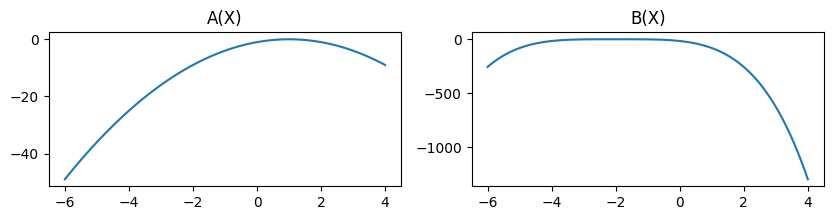

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-6,4, 100)
plt.figure(figsize=(10,2))
plt.subplot(121); plt.plot(x, A(x)); plt.title("A(X)")
plt.subplot(122); plt.plot(x, B(x)); plt.title("B(X)")

In [23]:
argmax(A), argmax(B)

(array([0.99999999]), array([-1.98794985]))

La función argmax busca el valor de x que maximiza la función f(x), esto lo hace utilizando la función minimize para minimizar el valor negativo de f(x) que es equivalente a maximizar f(x).